In [1]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [5]:
DATADIR = './dataset/PetImages'
CATEGORIES =['Dog','Cat']

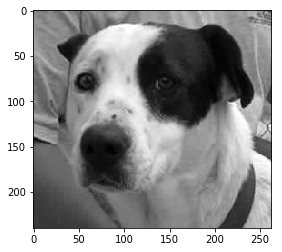

[[127 129 132 ...  65  80  89]
 [128 129 130 ...  61  80 102]
 [130 130 130 ...  98 106 118]
 ...
 [ 54  55  56 ... 205 204 200]
 [ 55  55  57 ... 202 202 202]
 [ 55  56  57 ... 198 198 200]]
(240, 263)


In [10]:
for category in CATEGORIES :
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) #convierte a array
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break
print(img_array)
print(img_array.shape)

In [14]:
IMG_SIZE = 100

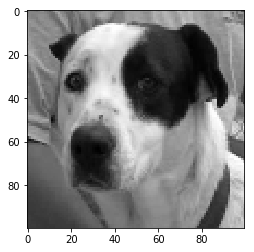

In [15]:
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [18]:
training_data=[]

def create_training_data():
    for category in CATEGORIES:
        
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)#obtener la clasificacion de 0 a 1, 0:perro ,1:cat
        
        for img in tqdm(os.listdir(path)):#iterar sobre cada imagen a por perro y por gato
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)#lo convierte a matriz
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))# redimenciona para normalizar el tamaño de la data
                training_data.append([new_array,class_num])#agrega esto a nuestro training_data
            except Exception as e: #para matener la salida limpia 
                pass
            
create_training_data()
print(len(training_data))
                
                
        

100%|██████████| 12485/12485 [00:13<00:00, 951.92it/s] 

24914


In [20]:
import random

In [22]:
random.shuffle(training_data)

In [25]:
for sample in training_data[:10]:
    print(sample[1])

1
0
1
1
0
1
1
1
0
1


In [27]:
X=[]
y=[]

for features, label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1,IMG_SIZE,IMG_SIZE,1))

X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

[[[[ 56]
   [ 57]
   [ 56]
   ...
   [120]
   [121]
   [122]]

  [[ 55]
   [ 56]
   [ 56]
   ...
   [123]
   [122]
   [124]]

  [[ 55]
   [ 56]
   [ 56]
   ...
   [124]
   [124]
   [124]]

  ...

  [[ 76]
   [ 38]
   [ 15]
   ...
   [ 94]
   [ 97]
   [ 96]]

  [[ 49]
   [ 31]
   [ 10]
   ...
   [ 94]
   [ 96]
   [ 96]]

  [[ 38]
   [ 26]
   [  6]
   ...
   [ 93]
   [ 96]
   [ 95]]]]


In [29]:
import pickle

In [45]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [46]:
pickle_in=open("X.pickle","rb")
X = pickle.load(pickle_in)

In [47]:
pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)